### Business Decision 
Target Subsets of customers for sending deal information

In [3]:
import pandas as pd
import matplotlib
import sklearn

In [4]:
raw_df = pd.read_csv('chateau.csv')

In [5]:
raw_df.head()

,CustomerNo,customer,PinotNoir,Champagne
0,1,Ebeling,7,34
1,2,England,8,34
2,3,Demburg,5,33
3,4,Eyberg,12,34
4,5,Zabar,9,30


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerNo  63 non-null     int64 
 1   customer    63 non-null     object
 2   PinotNoir   63 non-null     int64 
 3   Champagne   63 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.1+ KB


In [7]:
raw_df.describe()

,CustomerNo,PinotNoir,Champagne
count,63.000000,63.000000,63.000000
mean,32.000000,12.730159,16.380952
std,18.330303,8.729273,12.261175
min,1.000000,0.000000,0.000000
25%,16.500000,5.000000,6.000000
50%,32.000000,12.000000,13.000000
75%,47.500000,20.000000,28.500000
max,63.000000,36.000000,38.000000


In [21]:
selected_columns_df = raw_df[['PinotNoir','Champagne']]

In [22]:
selected_columns_df

,PinotNoir,Champagne
0,7,34
1,8,34
2,5,33
3,12,34
4,9,30
...,...,...
58,11,10
59,13,3
60,13,3
61,12,16


In [10]:
import warnings
warnings.filterwarnings('ignore')

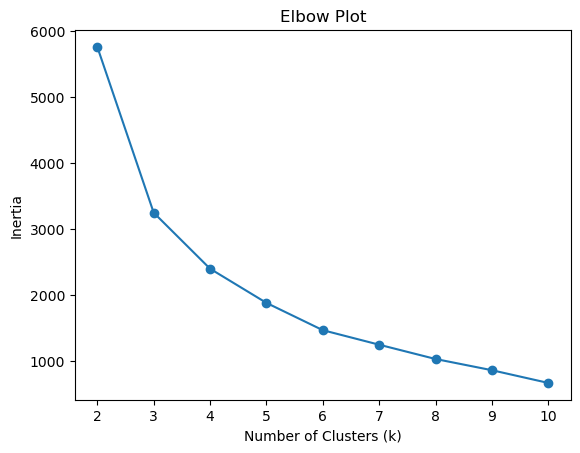

In [23]:
#Identify the number of cluster
from sklearn.cluster import KMeans
#number of clusters we want
k_values = range(2,11)

#Fit KMeans for each k and calculate the inertia
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(selected_columns_df)
    inertia_values.append(kmeans.inertia_)

import matplotlib.pyplot as plt
#Plot the elbow plot
plt.plot(k_values, inertia_values, marker = 'o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
    

In [24]:
# ========================================
# Identify the value of K using Silhouette
# ========================================
from sklearn.metrics import silhouette_score
silhouette_scores = []
k_values = range(2,10)
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(selected_columns_df)
    labels = kmeans.labels_
    silhouette_avg  = silhouette_score(selected_column_df,labels)
    silhouette_scores.append(silhouette_avg)
    print("For k =", k , ", the silhouette score is:",silhouette_avg)
    optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print("The optimal number of clusters (k) is:", optimal_k)


For k = 2 , the silhouette score is: 0.5177896553591894
For k = 3 , the silhouette score is: 0.4991281085927395
For k = 4 , the silhouette score is: 0.45850876420394737
For k = 5 , the silhouette score is: 0.4488199576445271
For k = 6 , the silhouette score is: 0.4441730762754557
For k = 7 , the silhouette score is: 0.4533899712110492
For k = 8 , the silhouette score is: 0.46664421856051147
For k = 9 , the silhouette score is: 0.48080007507862876
The optimal number of clusters (k) is: 2


In [35]:
# ======================================
# Create Clusters using the k-identified
# ======================================
k = 2
from sklearn.cluster import KMeans
cluster_model = KMeans(n_clusters = k, random_state = 10).fit(selected_columns_df)
print("Model", cluster_model)

Model KMeans(n_clusters=2, random_state=10)


In [36]:
print("Model",cluster_model.labels_)

Model [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [37]:
# ========================================
# Add cluster details to the original data
# ========================================
raw_df['cluster_id'] = cluster_model.labels_

In [38]:
raw_df

,CustomerNo,customer,PinotNoir,Champagne,cluster_id
0,1,Ebeling,7,34,0
1,2,England,8,34,0
2,3,Demburg,5,33,0
3,4,Eyberg,12,34,0
4,5,Zabar,9,30,0
...,...,...,...,...,...
58,59,Russo,11,10,1
59,60,Upsdell,13,3,1
60,61,Xao,13,3,1
61,62,Soule,12,16,1


In [39]:
# write the results for making interpretations
raw_df.to_excel('chateau_clustered_data.xlsx',index = False)

In [40]:
# ====================================
# Profile Clusters
# ====================================
centroids = cluster_model.cluster_centers_
column_names = selected_columns_df.columns.tolist()
cluster_profile_df = pd.DataFrame(centroids,columns = column_names)
print(cluster_profile_df)

   PinotNoir  Champagne
0   7.047619  31.571429
1  15.571429   8.785714


In [41]:
# Write to an excel file for reading this
cluster_profile_df.to_excel('cluster_profile_df.xlsx',index=True)

In [ ]:
### K = 3

In [42]:
# ======================================
# Create Clusters using the k-identified
# ======================================
k = 3
from sklearn.cluster import KMeans
cluster_model_2 = KMeans(n_clusters = k, random_state = 10).fit(selected_columns_df)
print("Model", cluster_model_2)

Model KMeans(n_clusters=3, random_state=10)


In [43]:
print("Model",cluster_model_2.labels_)

Model [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [44]:
# ========================================
# Add cluster details to the original data
# ========================================
raw_df['cluster_id_3'] = cluster_model_2.labels_

In [45]:
raw_df

,CustomerNo,customer,PinotNoir,Champagne,cluster_id,cluster_id_3
0,1,Ebeling,7,34,0,0
1,2,England,8,34,0,0
2,3,Demburg,5,33,0,0
3,4,Eyberg,12,34,0,0
4,5,Zabar,9,30,0,0
...,...,...,...,...,...,...
58,59,Russo,11,10,1,2
59,60,Upsdell,13,3,1,2
60,61,Xao,13,3,1,2
61,62,Soule,12,16,1,2


In [46]:
# write the results for making interpretations
raw_df.to_excel('chateau_clustered_data_3.xlsx',index = False)

In [47]:
# ====================================
# Profile Clusters
# ====================================
centroids = cluster_model_2.cluster_centers_
column_names = selected_columns_df.columns.tolist()
cluster_profile_df_2 = pd.DataFrame(centroids,columns = column_names)
print(cluster_profile_df_2)

   PinotNoir  Champagne
0   7.200000  32.250000
1  22.083333   9.666667
2   6.736842   8.157895


In [48]:
# Write to an excel file for reading this
cluster_profile_df_2.to_excel('cluster_profile_df_2.xlsx',index=True)